In [1]:
import pandas as pd

from gower.gower_dist import *

Simple example from D'Orazio

In [2]:
ex = pd.DataFrame({"Sex1": ["M", "M", "F", "F", "F", "M", "M", "F", "F", "F"],
                   "Sex2": ["M", "M", "F", "F", "F", "F", "F", "M", "M", "M"],
                   "Age1": [15] * 10,
                   "Age2": [15, 36, 58, 78, 100, 15, 36, 58, 78, 100]})
distances = np.diag(gower_matrix(ex[["Sex1", "Age1"]].to_numpy(), ex[["Sex2", "Age2"]].to_numpy(), weight_cat="uniform"))
print(distances)
ex.loc[np.argsort(distances)]

  0%|          | 0/1 [00:00<?, ?it/s]

[1.] [3.99693536]


  0%|          | 0/10 [00:00<?, ?it/s]

[0.         0.19761675 0.40464383 0.59285026 0.79987734 0.20012266
 0.39773942 0.60476649 0.79297292 1.        ]


,Sex1,Sex2,Age1,Age2
0,M,M,15,15
1,M,M,15,36
5,M,F,15,15
6,M,F,15,36
2,F,F,15,58
3,F,F,15,78
7,F,M,15,58
8,F,M,15,78
4,F,F,15,100
9,F,M,15,100


Laptops dataset

In [3]:
laptops = pd.read_csv("laptops/laptops_train.csv", index_col=0)
print(laptops.shape)
print(laptops.apply(lambda col: col.unique(), axis=0).apply(len))
laptops.drop(["Operating System Version", "Model Name"], axis=1, inplace=True)
laptops.RAM = np.log2(laptops.RAM.str[:-2].astype(float))  # all in GB
laptops.Weight = laptops.Weight.str[:-2].astype(float)  # all in kg
laptops["Screen Size"] = laptops["Screen Size"].str[:-1].astype(float)  # all in inches

(977, 12)
Model Name                  488
Category                      6
Screen Size                  18
Screen                       38
CPU                         106
RAM                           8
 Storage                     36
GPU                          98
Operating System              7
Operating System Version      5
Weight                      166
Price                       639
dtype: int64


  0%|          | 0/4 [00:00<?, ?it/s]

[1. 1. 1. 1. 1. 1.] [12.83355789  6.65437203 95.36178466 95.82488492]


  0%|          | 0/977 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

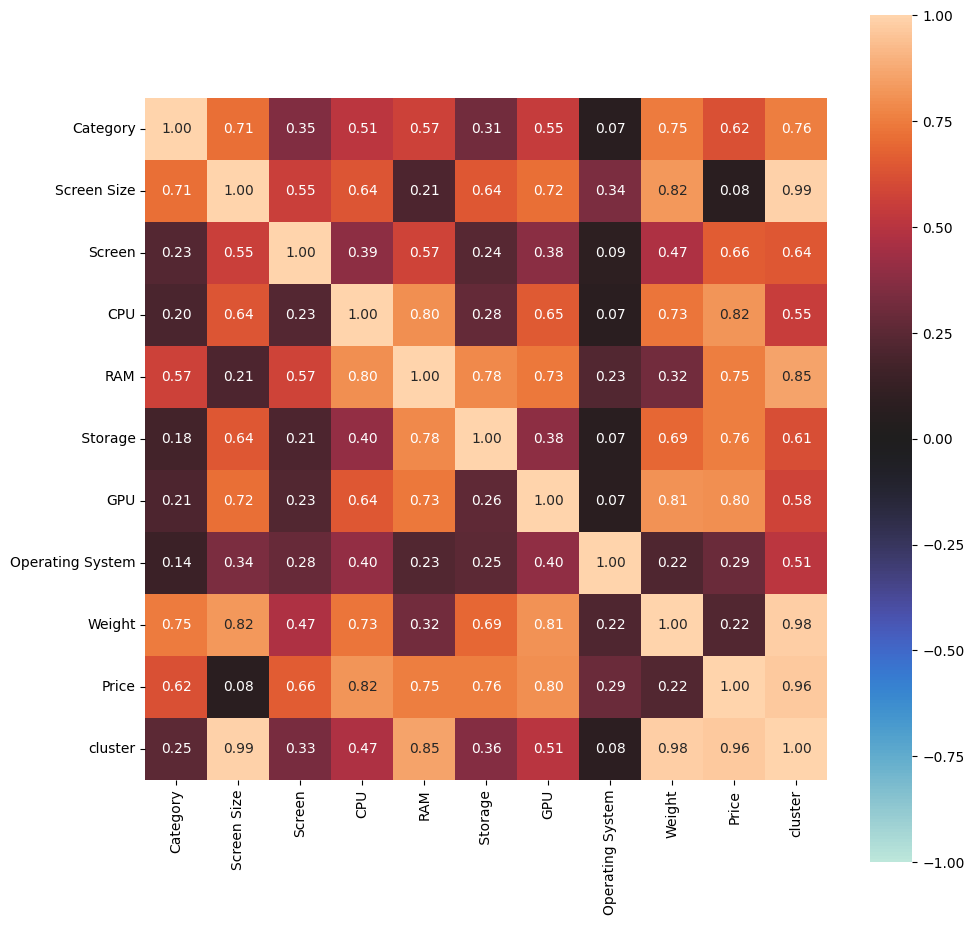

{'eps': 0.02, 'min_samples': 1} 0.5847062640512575 0.6921334851775626
{1: 271, 2: 41, 3: 13, 4: 6, 5: 3, 7: 2, 8: 1, 18: 2, 50: 1, 61: 1, 377: 1}


,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,cluster
Manufacturer,,,,,,,,,,,
HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,3.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900.00,2
Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,2.0,500GB HDD,AMD Radeon R5,Windows,2.10,3556800.00,2
HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,2.0,500GB HDD,Intel HD Graphics 620,No OS,1.86,3502558.80,2
HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,2.0,500GB HDD,Intel HD Graphics 520,No OS,1.86,3067651.08,2
Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,2.0,256GB SSD,AMD Radeon R5 M430,Windows,2.20,4436218.80,2
...,...,...,...,...,...,...,...,...,...,...,...
HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,4.0,1TB HDD,Nvidia GeForce MX150,Windows,2.90,9416628.00,94
MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,4.0,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.14,22221108.00,95
Lenovo,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,3.0,512GB SSD,Nvidia GeForce GTX 1050M,Windows,2.00,15107508.00,96


In [4]:
laptops = optimize_clusters(laptops)

laptops


pokemon dataset

In [5]:
pokemon = pd.read_csv("pokemon/pokemon_alopez247.csv").iloc[:, 2:]
for c in pokemon.columns[pokemon.dtypes != object]:
    pokemon.loc[pokemon[c].isna(), c] = np.nanmedian(pokemon[c])
for c in pokemon.columns[pokemon.dtypes == object]:
    pokemon.loc[pokemon[c].isna(), c] = "none"

  0%|          | 0/12 [00:00<?, ?it/s]

[1. 1. 1. 1. 1. 1. 1. 1. 1.] [96.6665904  38.85411522 77.0431247  54.85986733 73.42711118 36.96922451
 75.11272547  5.          5.65685425 16.92589328 37.29163913 27.97068161]


  0%|          | 0/721 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

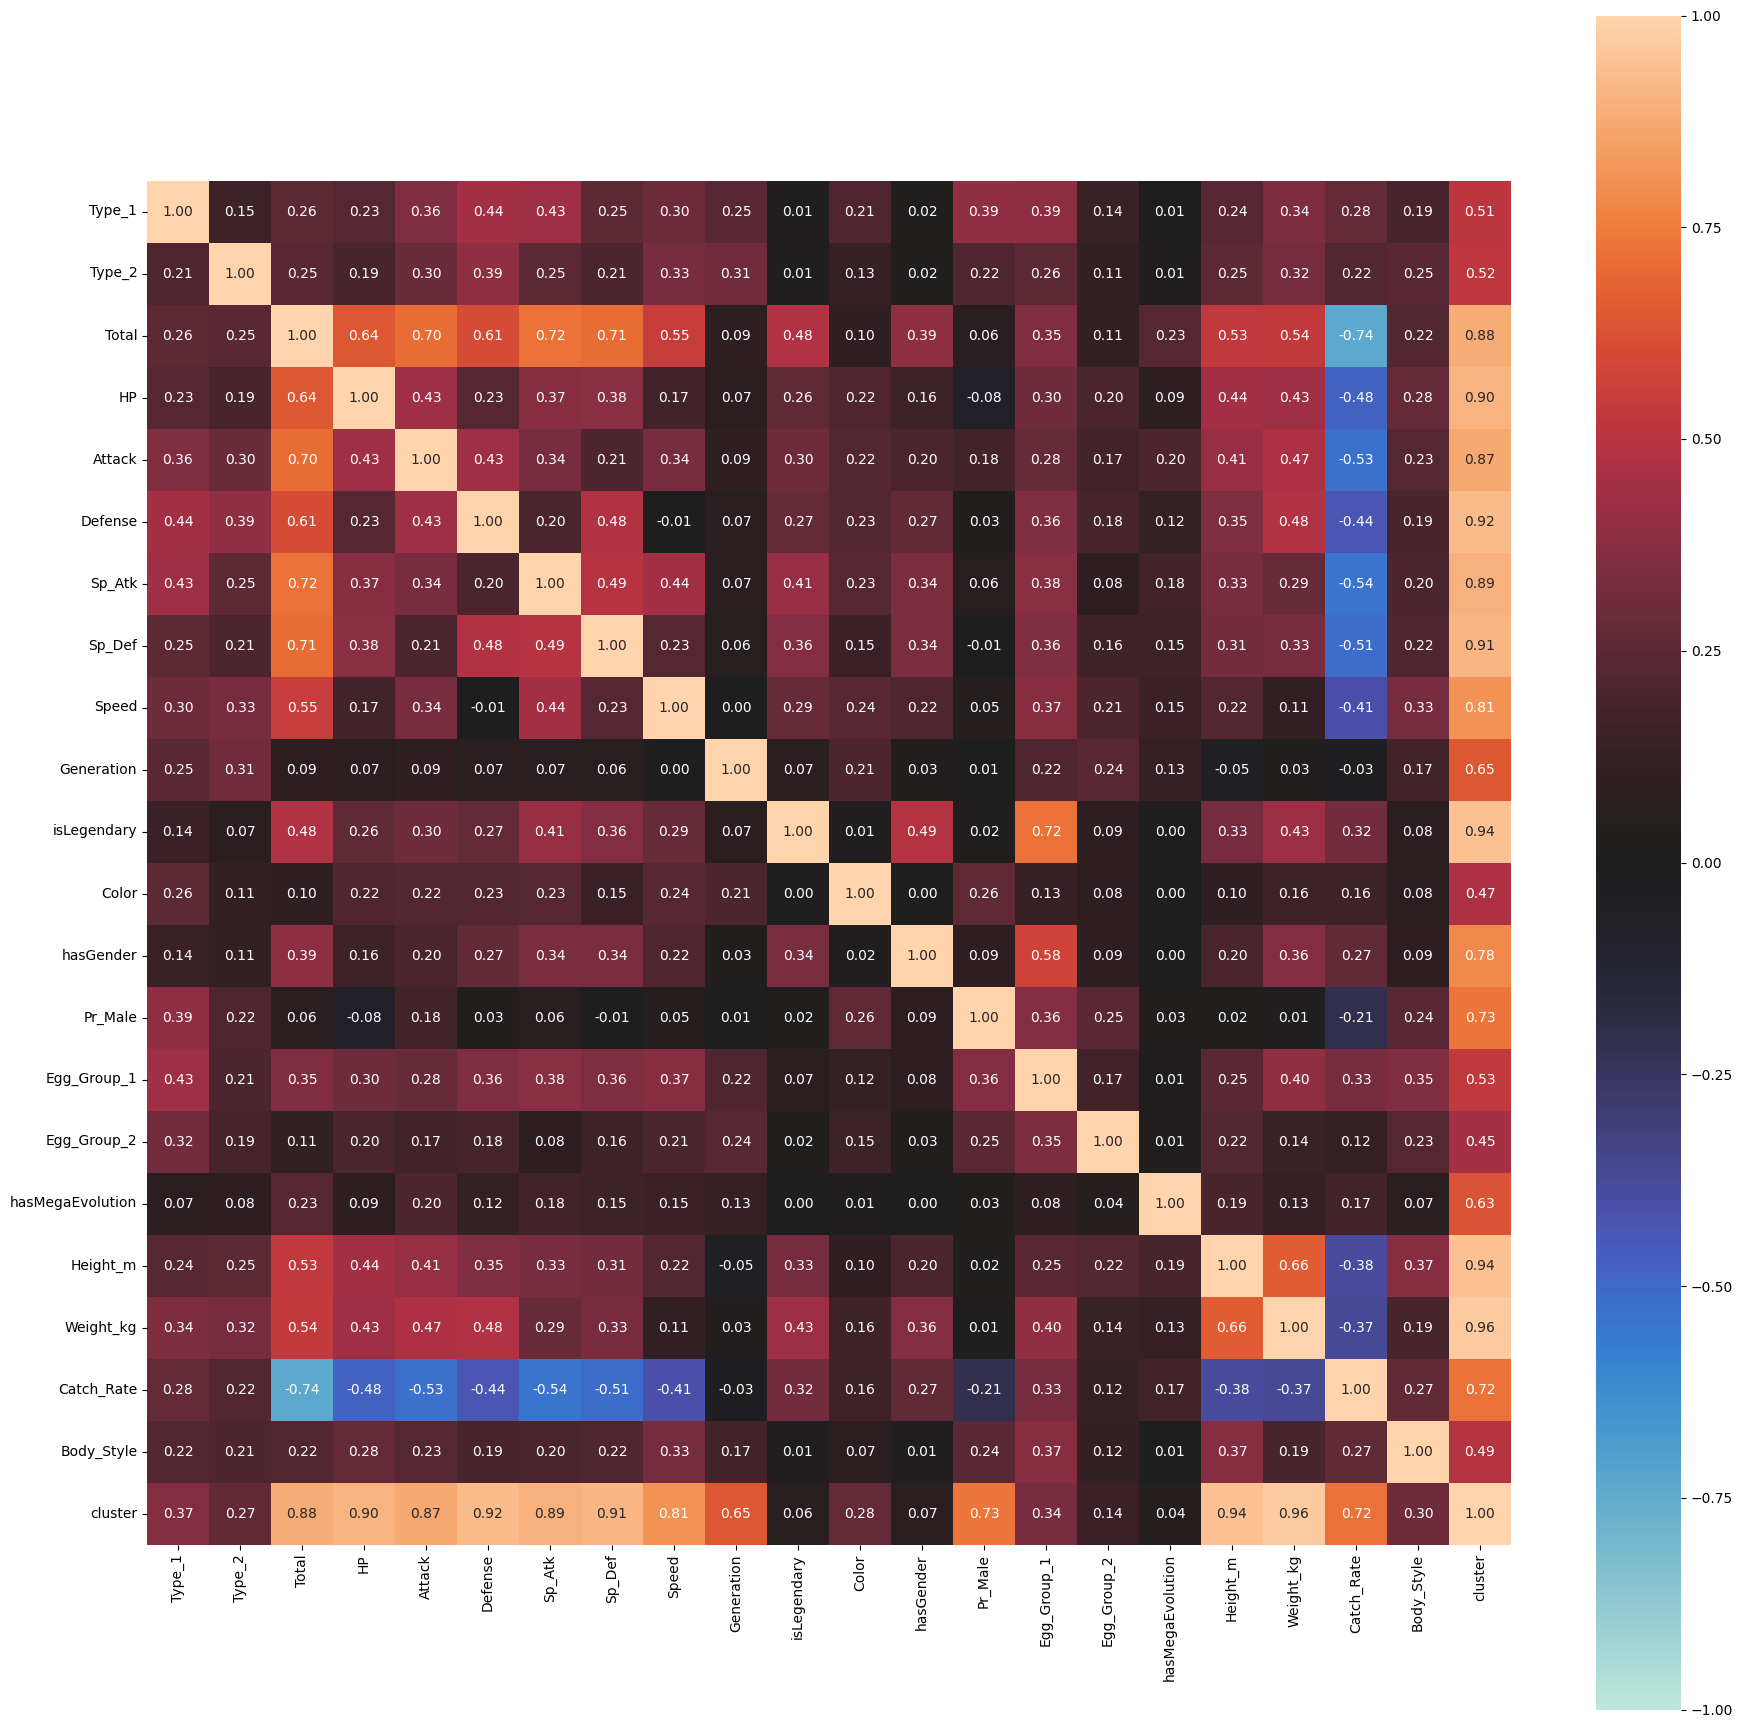

{'eps': 0.05, 'min_samples': 1} 0.5215907603940678 0.6719061404684297
{1: 246, 2: 26, 3: 10, 4: 3, 5: 2, 6: 1, 7: 1, 8: 1, 17: 1, 25: 1, 308: 1}


,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,cluster
0,Grass,Poison,318,45,49,49,65,65,45,1,...,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped,0
1,Grass,Poison,405,60,62,63,80,80,60,1,...,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped,0
3,Fire,none,309,39,52,43,60,50,65,1,...,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed,0
4,Fire,none,405,58,64,58,80,65,80,1,...,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed,0
6,Water,none,314,44,48,65,50,64,43,1,...,True,0.875,Monster,Water_1,False,0.51,9.0,45,bipedal_tailed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Steel,Flying,465,65,80,140,40,70,70,2,...,True,0.500,Flying,none,False,1.70,50.5,25,two_wings,94
229,Water,Dragon,540,75,95,95,95,95,85,2,...,True,0.500,Water_1,Dragon,False,1.80,152.0,45,head_base,96
234,Normal,none,250,55,20,35,20,45,75,2,...,True,0.500,Field,none,False,1.19,58.0,45,bipedal_tailed,97
235,Fighting,none,210,35,35,35,35,35,35,2,...,True,1.000,Undiscovered,none,False,0.71,21.0,75,bipedal_tailless,98


In [6]:
pokemon = optimize_clusters(pokemon)

pokemon


cereal dataset

In [7]:
cereal = pd.read_csv("cereal.csv", index_col="name")

  0%|          | 0/13 [00:00<?, ?it/s]

[1. 1.] [ 9.6975038   5.          3.78929142 21.92923451  8.42003061 15.78397359
 16.         26.65581837  1.75476535  2.          4.80607592 10.29636924
 29.96241365]


  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

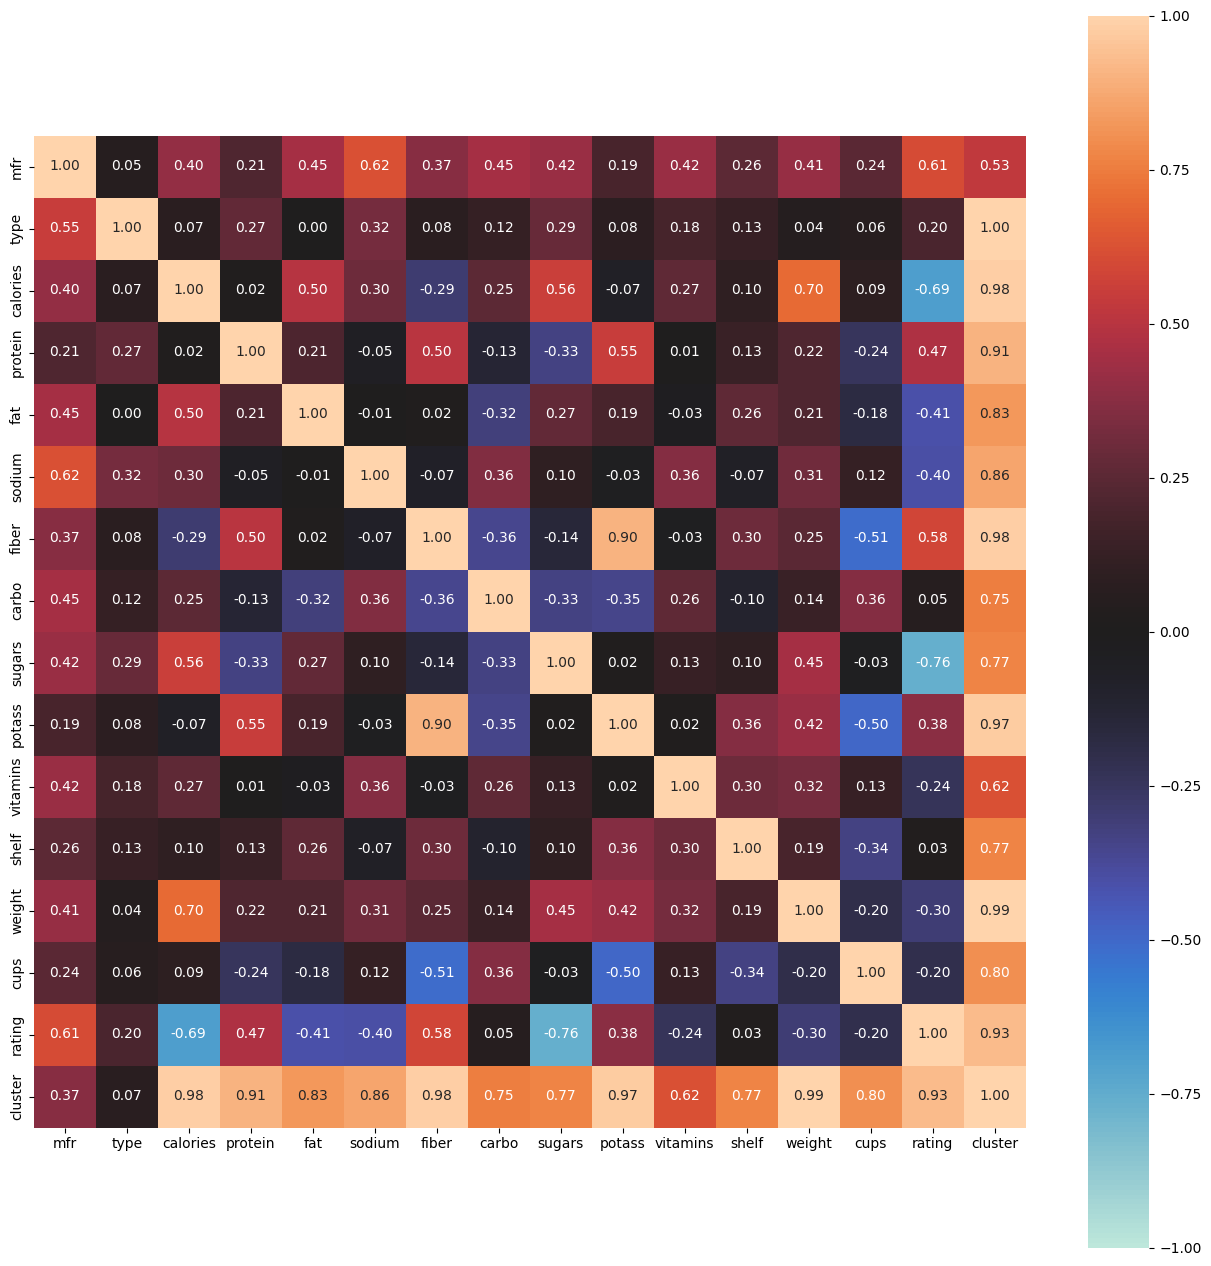

{'eps': 0.08, 'min_samples': 1} 0.6790352874252288 0.8215992716776256
{1: 17, 2: 2, 3: 3, 4: 2, 7: 1, 32: 1}


,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cluster
name,,,,,,,,,,,,,,,,
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,4
Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541,4
Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.0,1.00,33.174094,4
Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851,4
Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,45,25,2,1.0,0.75,19.823573,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Special K,K,C,110,6,0,230,1.0,16.0,3,55,25,1,1.0,1.00,53.131324,24
Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.5,1.00,28.592785,25
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,3


In [8]:
cereal = optimize_clusters(cereal)

cereal


fast food dataset

In [9]:
fastfood = pd.read_csv("fastfood.csv", index_col="item")

fastfood.drop(["fiber", "protein", "vit_a", "vit_c", "calcium", "salad"], axis=1, inplace=True)

  0%|          | 0/9 [00:00<?, ?it/s]

[1.] [40.95627062 53.11309244 46.1187623  29.90737964  5.65685425 13.12461869
 50.3873613  61.7463406  10.64881656]


  0%|          | 0/515 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

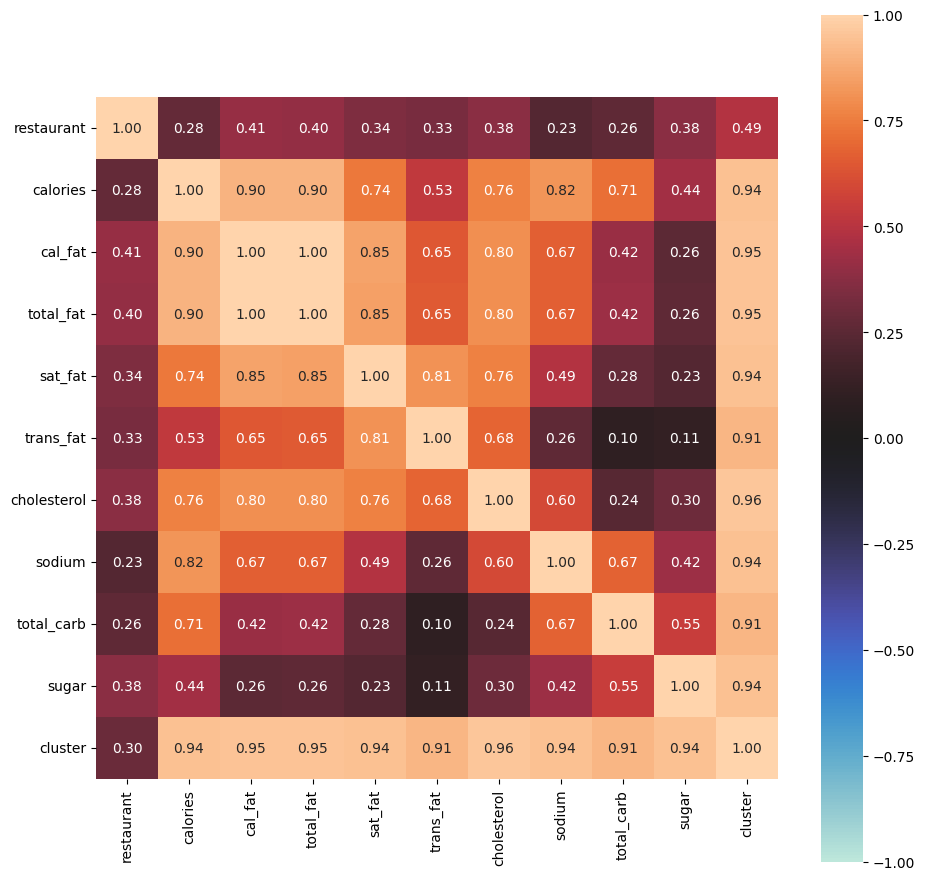

{'eps': 0.02, 'min_samples': 1} 0.5244255187955237 0.894203653616357
{1: 153, 2: 20, 3: 9, 4: 5, 5: 1, 6: 1, 7: 1, 8: 1, 249: 1}


,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,sugar,cluster
item,,,,,,,,,,,
Big Mac,Mcdonalds,540,250,28,10.0,1.0,80,950,46,9,5
Cheeseburger,Mcdonalds,300,100,12,5.0,0.5,40,680,33,7,5
Classic Chicken Sandwich,Mcdonalds,510,210,24,4.0,0.0,65,1040,49,6,5
Filet-O-Fish®,Mcdonalds,380,170,18,4.0,0.0,40,640,38,5,5
Garlic White Cheddar Burger,Mcdonalds,620,300,34,13.0,1.5,95,790,48,11,5
...,...,...,...,...,...,...,...,...,...,...,...
Double Quarter Pound King,Burger King,900,486,54,25.0,3.0,210,1740,50,11,94
Farmhouse King,Burger King,1220,720,80,28.0,3.0,335,2050,62,15,95
Mushroom & Swiss King,Burger King,940,567,63,21.0,2.5,175,1380,45,8,96


In [10]:
fastfood = optimize_clusters(fastfood)

fastfood

diabetes dataset

In [11]:
diabetes = pd.read_csv("diabetes.csv")

  0%|          | 0/9 [00:00<?, ?it/s]

[] [ 15.6687239   68.36546846  30.23277791  20.55533161  65.75373944
  53.14686009 128.44306758  42.16776091   1.        ]


  0%|          | 0/768 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

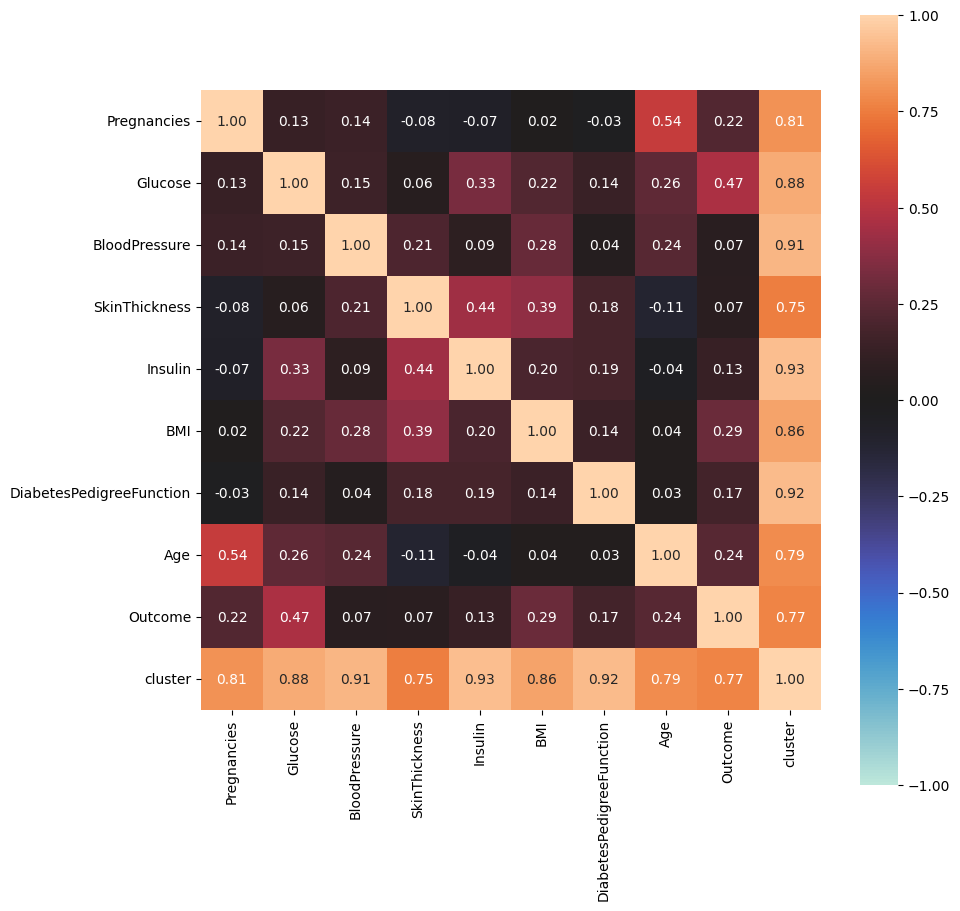

{'eps': 0.04, 'min_samples': 1} 0.47763551555010375 0.8618580873835835
{1: 274, 2: 26, 3: 8, 4: 3, 5: 1, 7: 3, 380: 1}


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
1,1,85,66,29,0,26.6,0.351,31,0,1
3,1,89,66,23,94,28.1,0.167,21,0,1
5,5,116,74,0,0,25.6,0.201,30,0,1
6,3,78,50,32,88,31.0,0.248,26,1,1
10,4,110,92,0,0,37.6,0.191,30,0,1
...,...,...,...,...,...,...,...,...,...,...
186,8,181,68,36,495,30.1,0.615,60,1,95
187,1,128,98,41,58,32.0,1.321,33,1,96
188,8,109,76,39,114,27.9,0.640,31,1,97
191,9,123,70,44,94,33.1,0.374,40,0,98


In [12]:
diabetes = optimize_clusters(diabetes)

diabetes


airbnb dataset

  0%|          | 0/13 [00:00<?, ?it/s]

[1. 1. 1. 1. 1. 1.] [5.94929869e+00 4.00000000e+00 1.00000000e+00 1.00000000e+00
 6.72717132e+00 2.91918600e+01 6.24025147e+00 2.50258861e+02
 6.30706042e+01 4.04005638e+01 1.77899129e+02 3.70214816e+02
 1.33016132e+03]


/Users/temp/gower/gower/gower_dist.py:234: TqdmWarning: Iterable length 5000 > 1000 but `chunksize` is not set. This may seriously degrade multiprocess performance. Set `chunksize=1` or more.
  processed = process_map(g, range(x_n_rows), **tqdm_kwargs)


  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

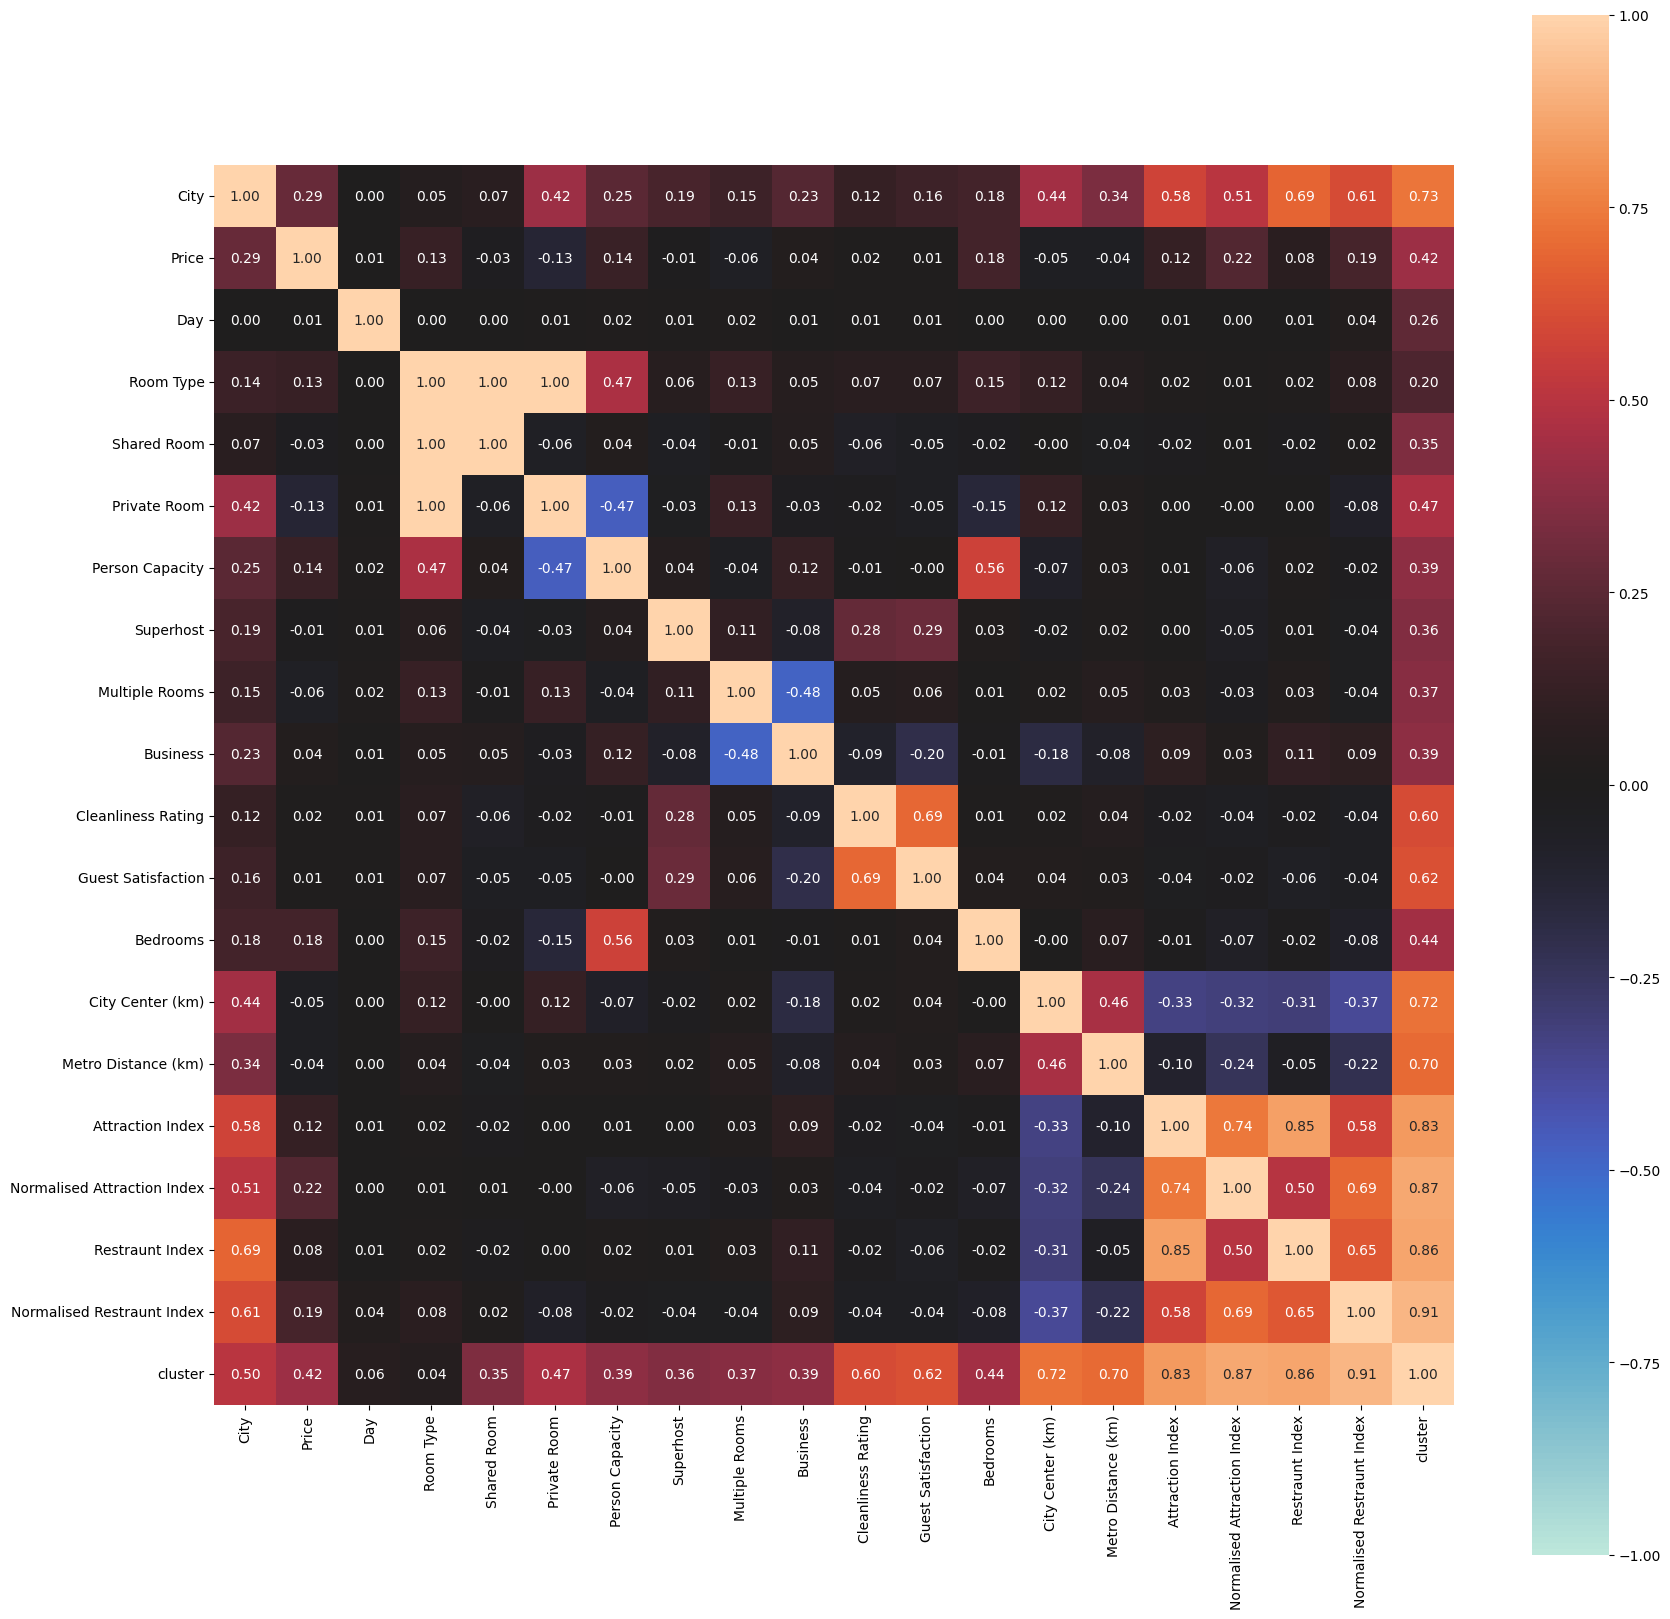

{'eps': 0.01, 'min_samples': 1} 0.7713130316289702 0.5598451271486344
{1: 403, 2: 63, 3: 38, 4: 6, 5: 12, 6: 8, 7: 5, 8: 3, 9: 2, 10: 1, 13: 3, 14: 1, 15: 2, 19: 3, 20: 1, 21: 1, 25: 1, 33: 1, 34: 1, 62: 1, 63: 1, 90: 1, 404: 1, 731: 1, 1235: 1, 1280: 1}


,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,cluster
8362,Barcelona,237.158750,Weekday,Private room,False,True,2.0,False,1,0,10.0,100.0,1,3.542898,0.167719,219.800170,7.491144,402.586697,8.862172,4
7996,Barcelona,190.844136,Weekday,Private room,False,True,2.0,False,0,1,10.0,93.0,1,1.158803,0.109392,632.584753,21.559509,1374.242827,30.251314,4
37232,Rome,141.911954,Weekend,Private room,False,True,2.0,False,0,0,9.0,91.0,1,3.556596,1.256939,385.551078,8.542055,1043.754031,22.740868,4
7647,Barcelona,229.245700,Weekday,Private room,False,True,3.0,False,1,0,9.0,92.0,1,0.577927,0.332052,650.296042,22.163138,1399.207816,30.800870,4
34995,Rome,207.607603,Weekend,Entire home/apt,False,False,2.0,True,0,0,10.0,99.0,1,3.786785,0.656664,177.784216,3.938888,505.928623,11.022957,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,Amsterdam,1044.923019,Weekend,Entire home/apt,False,False,4.0,True,1,0,10.0,99.0,2,2.106852,0.565336,262.189671,13.881743,375.179020,32.706605,9
23767,Paris,486.764843,Weekday,Entire home/apt,False,False,2.0,False,0,0,9.0,93.0,1,2.063136,0.268946,672.901524,32.756619,1200.614087,70.547528,90
37451,Rome,202.464171,Weekend,Entire home/apt,False,False,4.0,False,0,0,8.0,80.0,2,2.525662,0.017672,486.870035,10.786821,1114.514757,24.282573,92
20345,Lisbon,329.737336,Weekend,Entire home/apt,False,False,3.0,False,0,1,10.0,100.0,1,0.385165,0.186713,397.094271,13.097467,1074.465161,60.387784,93


In [13]:
airbnb = pd.read_csv('Aemf1.csv').sample(n=5000, random_state=0)

airbnb = optimize_clusters(airbnb)

airbnb


customer shopping dataset

In [14]:
istanbul = pd.read_csv("customer_shopping_data.csv").sample(n=10000, random_state=0).iloc[:, 2:]
istanbul["price_per_unit"] = istanbul["price"] / istanbul["quantity"]
istanbul.drop("invoice_date", axis=1, inplace=True)

  0%|          | 0/4 [00:00<?, ?it/s]

[1. 1. 1. 1.] [51.          4.         11.95491219  3.38671333]


/Users/temp/gower/gower/gower_dist.py:234: TqdmWarning: Iterable length 10000 > 1000 but `chunksize` is not set. This may seriously degrade multiprocess performance. Set `chunksize=1` or more.
  processed = process_map(g, range(x_n_rows), **tqdm_kwargs)


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

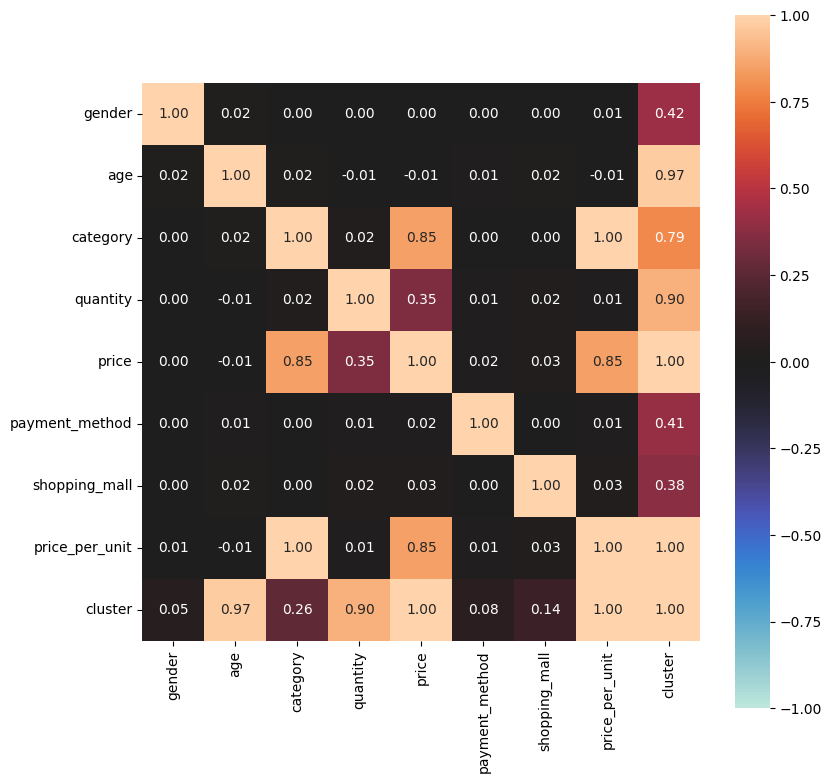

{'eps': 0.02, 'min_samples': 1} 0.7392317426221814 0.6814114131434912
{1: 1719, 2: 466, 3: 142, 4: 72, 5: 41, 6: 30, 7: 18, 8: 13, 9: 4, 10: 12, 11: 1, 12: 3, 13: 1, 14: 3, 15: 1, 16: 4, 17: 1, 18: 1, 19: 1, 20: 3, 23: 1, 29: 1, 35: 2, 36: 1, 37: 1, 40: 1, 45: 1, 49: 1, 52: 1, 61: 1, 65: 1, 68: 1, 99: 2, 115: 1, 118: 1, 126: 1, 127: 1, 166: 1, 177: 1, 180: 1, 206: 1, 266: 1, 271: 1, 275: 1, 280: 1, 309: 1, 312: 1, 803: 1, 1065: 1}


,gender,age,category,quantity,price,payment_method,shopping_mall,price_per_unit,cluster
65869,Male,61,Toys,1,35.84,Cash,Mall of Istanbul,35.84,0
22122,Female,50,Toys,2,71.68,Cash,Kanyon,35.84,0
44322,Female,63,Toys,5,179.20,Cash,Mall of Istanbul,35.84,0
74351,Female,50,Cosmetics,4,162.64,Cash,Istinye Park,40.66,0
55453,Female,68,Cosmetics,1,40.66,Cash,Metrocity,40.66,0
...,...,...,...,...,...,...,...,...,...
64833,Female,36,Clothing,2,600.16,Debit Card,Emaar Square Mall,300.08,992
99052,Female,42,Shoes,2,1200.34,Credit Card,Forum Istanbul,600.17,993
14391,Female,65,Cosmetics,2,81.32,Debit Card,Forum Istanbul,40.66,995
56698,Male,53,Technology,5,5250.00,Debit Card,Cevahir AVM,1050.00,998


In [15]:
istanbul = optimize_clusters(istanbul)

istanbul


indian food dataset

  0%|          | 0/1 [00:00<?, ?it/s]

[1. 1. 1. 1. 1.] [39.0976345]


  0%|          | 0/288 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

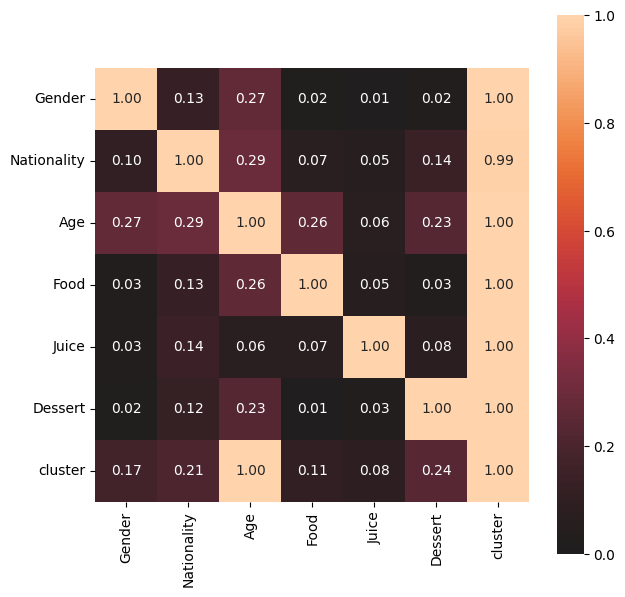

{'eps': 0.02, 'min_samples': 1} 0.5788299125296875 0.6989308722161591
{1: 98, 2: 15, 3: 4, 4: 4, 5: 4, 6: 1, 7: 1, 11: 1, 13: 1, 14: 1, 15: 3, 16: 1}


,,Gender,Nationality,Age,Food,Juice,Dessert,cluster
Timestamp,Participant_ID,,,,,,,
2019/05/07 4:38:13 PM GMT+8,FPS084,Female,Indian,40,Traditional food,Fresh Juice,No,64
2019/05/07 4:41:57 PM GMT+8,FPS088,Female,Indian,36,Traditional food,Fresh Juice,No,64
2019/05/07 6:04:46 PM GMT+8,FPS133,Female,Indian,32,Traditional food,Fresh Juice,No,64
2019/05/07 6:16:52 PM GMT+8,FPS144,Female,Indian,38,Traditional food,Fresh Juice,No,64
2019/05/08 1:12:06 AM GMT+8,FPS180,Female,Indian,35,Traditional food,Fresh Juice,No,64
...,...,...,...,...,...,...,...,...
2019/05/07 7:04:50 PM GMT+8,FPS155,Male,Indian,15,Western Food,Carbonated drinks,Yes,99
2019/05/07 3:09:06 PM GMT+8,FPS015,NaN,Muslim,27,Traditional food,Fresh Juice,Yes,-1
2019/05/08 1:03:16 PM GMT+8,FPS226,NaN,Indian,30,Traditional food,Fresh Juice,Yes,-1


In [16]:
indian_food = pd.read_csv('Food_Preference.csv').set_index(["Timestamp", "Participant_ID"], drop=True)

indian_food = optimize_clusters(indian_food)

indian_food


competition dataset

In [17]:
# competition = pd.read_csv('tabular-playground-series-jul-2022/data.csv')
#
# competition = optimize_clusters(competition, use_mp=False)
#
# competition
